In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import time
import os
import h5py
sys.path.append('src_cython')
from mainDefs import eval,zwatershed_and_metrics_h5
start = time.clock()

def evaluateFile(args):
    hdf5_gt_file,hdf5_pred_file,threshes,funcs,save_threshes,out = args
    hdf5_gt = h5py.File(hdf5_gt_file, 'r')
    hdf5_aff = h5py.File(hdf5_pred_file, 'r')
    gt = np.asarray(hdf5_gt[hdf5_gt.keys()[0]],dtype='uint32')
    aff = np.asarray(hdf5_aff[hdf5_aff.keys()[0]],dtype='float32')
    aff = np.transpose(aff,(1,2,3,0))

    dims = np.array(aff.shape,dtype='uint32')
    print 'dims:',aff.shape

    # trim gt data - only works for perfect cubes
    gt_data_dimension = gt.shape[0]
    data_dimension = aff.shape[1]
    if gt_data_dimension != data_dimension:
        print("Data dimension do not match. Clip the GT borders.")
        padding = (gt_data_dimension - data_dimension) / 2
        gt = gt[padding:(-1*padding),padding:(-1*padding),padding:(-1*padding)]
        print"New GT data shape :",gt.shape

    # change both to fortran order
    gt = np.array(gt,order='F')
    aff = np.array(aff,order='F')

    # evaluate call
    print "gt shape:",gt.shape
    print "aff shape:",aff.shape
  # if not os.path.exists(out):
  #      os.makedirs(out)
    print('out: '+out)
    f = open(out+'info.txt', 'w')
    f.write('gt: '+hdf5_gt_file+'\n')
    f.write('pred: '+hdf5_pred_file+'\n')
    f.write('pred_dims: '+np.array_str(dims))
    f.write('threshes: '+np.array_str(np.array(threshes)))
    f.close()
#    eval(gt,aff,threshes,funcs,save_threshes,out)
    m = zwatershed_and_metrics_h5(gt,aff,threshes,save_threshes)
    return m


    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
print "running evaluateFile main..."
hdf5_gt_file = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
#hdf5_aff_file = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_aff.h5'
#hdf5_pred_file = '/tier2/turaga/singhc/output_10000/tstvol-1_5.h5'

threshes = [2000] # for i in range(1,6)]+[i*20000 for i in range(2,16)] # 100...1,000...100,000
funcs = ['square'] # ['linear','square','threshold','watershed','lowhigh']
out = '/groups/turaga/home/singhc/evaluation/out/'
iters = [10000]
strs = ["2"]
files = ['/tier2/turaga/singhc/train/output_200000/tstvol-1_' +strs[i] for i in range(len(strs))]

m = evaluateFile([hdf5_gt_file,files[i]+'.h5',threshes,funcs,[],out])

running evaluateFile main...
dims: (432, 432, 432, 3)
Data dimension do not match. Clip the GT borders.
New GT data shape : (432, 432, 432)
gt shape: (432, 432, 432)
aff shape: (432, 432, 432, 3)
out: /groups/turaga/home/singhc/evaluation/out/
calling eval...


In [5]:
%matplotlib inline 
import os
import os.path as op
import matplotlib.cm as cm
import numpy as np
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import h5py
import array
from visualization.visualize_funcs import display_preds,display_seg,trim,formatAndSave,load_seg_from_dat
   
## Just to access the images...
data_folder = 'nobackup/turaga/data/fibsem_medulla_7col/tstvol-520-1-h5/'
os.chdir('/.')

#Open training data
f = h5py.File(data_folder + 'img_normalized.h5', 'r')
im = f['main']

#Open training labels
g = h5py.File(data_folder + 'groundtruth_aff.h5', 'r')
label_set = np.asarray(g['main'],dtype='float32') #3,z,y,x
label_set = np.transpose(label_set,(1,2,3,0))

1
(520, 520, 520)
(520, 520, 520, 3)
(432, 432, 432)
(432, 432, 432)
(432, 432, 432, 3)
(432, 432, 432)


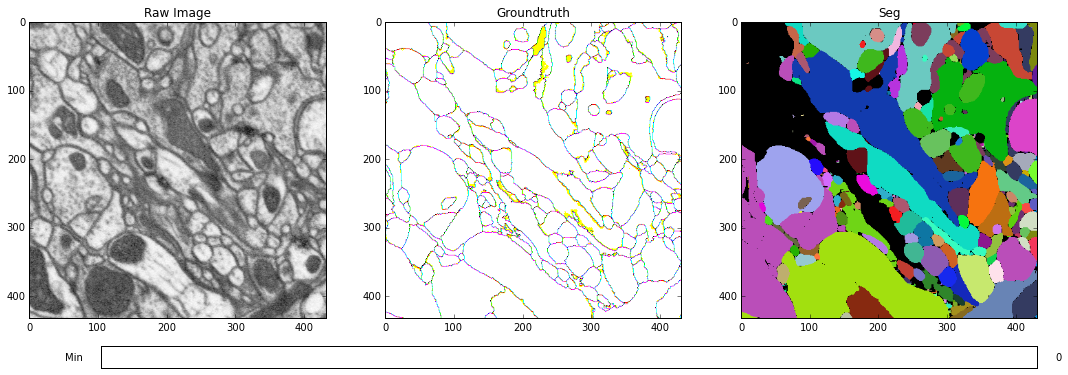

In [6]:
# loading h5
'''
hdf5_seg_file = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-2-h5/groundtruth_seg_thick.h5'
hdf5_seg = h5py.File(hdf5_seg_file, 'r')
seg = np.asarray(hdf5_seg['main'],dtype='uint32')
'''
print len(m[0])
seg = m[0][0]
print im.shape
print label_set.shape
print seg.shape
im,label_set=trim(im,label_set,seg)
print im.shape
print label_set.shape
print seg.shape
display_seg(im, label_set, seg, im_size=label_set.shape[0], im2_size=seg.shape[0])

In [ ]:
import sys
sys.modules.clear(  )

In [5]:
i

0

In [12]:
print m[1]
x = np.array(3,2)
x[0,:] = m[1]

[0.8428707715667361, 0.9694421367805383]


TypeError: data type not understood

In [14]:
x = [3.0,4.0,5.0,2.0,1.0]
arr = np.array(x,dtype='uint32')
print arr

[3 4 5 2 1]
